In [73]:
import pandas as pd
import seaborn as sns


In [3]:
logs_data = pd.read_csv('3_logs.csv')
users_data = pd.read_csv('3_user_data.csv')


In [63]:
users_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [68]:
logs_data

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [69]:
full_data = logs_data.merge(users_data, on = 'client')

In [78]:
premium_platform = full_data.query('premium == True')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


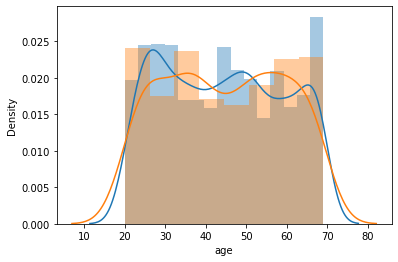

In [80]:
sns.distplot(full_data.age)
sns.distplot(premium_platform.age)

In [88]:
full_data.query('success == True').groupby('client').size()

client
40       1
75       1
81       1
132      1
164      1
        ..
99908    1
99926    1
99927    1
99931    1
99973    1
Length: 2104, dtype: int64

In [93]:
full_data.query('success == True').groupby('age').success.value_counts()

age  success
20   True        37
21   True        46
22   True        39
23   True        42
24   True        79
25   True        93
26   True        43
27   True        46
28   True       120
29   True        42
30   True        40
31   True        44
32   True        77
33   True        45
34   True        40
35   True        50
36   True        48
37   True        50
38   True        49
39   True        39
40   True        33
41   True        43
42   True        41
43   True        54
44   True        53
45   True        41
46   True        47
47   True        50
48   True        49
49   True        86
50   True        44
51   True        42
52   True        90
53   True        29
54   True        48
55   True        37
56   True        35
57   True        38
58   True        55
59   True        41
60   True        36
61   True        40
62   True        47
63   True        30
64   True        35
65   True        79
66   True        35
67   True        47
68   True        92
69   Tr

In [50]:
most_successful_client = logs_data.query('success == True').client.value_counts().idxmax()
most_successful_client

36165

In [51]:
max_successful_operations = logs_data[logs_data.client == most_successful_client].success.sum()
max_successful_operations

41

In [52]:
same_successful_clients = logs_data[logs_data.success == True].client.value_counts()

In [53]:
same_successful_clients = same_successful_clients[same_successful_clients == max_successful_operations]

In [54]:
same_successful_clients =same_successful_clients.index.tolist()

In [55]:
same_successful_clients

[36165, 61468, 12179, 61473, 78349, 28719, 92584, 52870, 82563]

In [58]:
sorted(same_successful_clients)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [59]:
logs_data.query('success == True').groupby('platform').success.value_counts()

platform  success
computer  True       1090
phone     True       2019
tablet    True        180
Name: success, dtype: int64

In [ ]:
logs_data.query('success == True').groupby('platform').success.value_counts()